In [2]:
import torch as t
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from torch import nn, optim
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv('../06ANN_module/fashion-mnist_test.csv')
x = df.iloc[:,1:]
y = df.iloc[:,0]
# df.head()

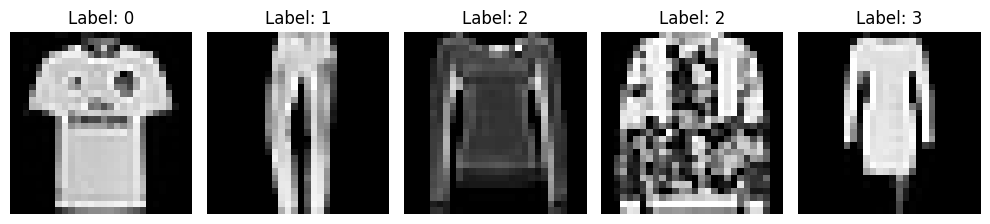

In [6]:
# Extract first four rows, excluding the label column (skip the first column)
number_of_pic = 5
first_three = df.iloc[:number_of_pic, 1:]

# Extract labels (first column of df)
labels = df.iloc[:number_of_pic, 0].values  # Extract labels

# Reshape the pixel values of the first four images (each image is 28x28)
images = first_three.values.reshape(number_of_pic, 28, 28)

# Plot the first four images
fig, axes = plt.subplots(1, number_of_pic, figsize=(10, 4))
for i in range(number_of_pic):
    axes[i].imshow(images[i], cmap="gray")  # Display as grayscale
    axes[i].set_title(f"Label: {labels[i]}")  # Show the label as title
    axes[i].axis("off")  # Remove axis for cleaner look
    print()
plt.tight_layout()
plt.show()



In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# scaling
x_train = x_train/255.0
x_test = x_test/255.0
x_train.shape

(8000, 784)

In [8]:

class CustomDataset(Dataset):
    def __init__(self, features, labels):
        # Convert DataFrame to NumPy array first and then to Tensor
        self.features = t.tensor(features.values, dtype=t.float32).reshape(-1,1,28,28)  # Convert DataFrame to NumPy array
        self.labels = t.tensor(labels.values, dtype=t.long)  # Convert DataFrame to NumPy array
    
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        sample = self.features[idx]
        label = self.labels[idx]
        return sample, label

In [15]:
myTrainData = CustomDataset(x_train,y_train)
myTestData = CustomDataset(x_test,y_test)
myTrainDat = DataLoader(myTrainData, batch_size=10, shuffle=True)
myTrainDat = DataLoader(myTestData, batch_size=10, shuffle=False)

In [16]:
class ANN(nn.Module):
    def __init__(self, input_size):
        super(ANN, self).__init__()
        self.features = nn.sequential()
        self.classifier = nn.sequential()
    
    def forward(self, x):
        x = self.feature(x)
        x = self.classifier(x)
        return x

In [25]:
# Initialize Model, Loss, and Optimizer
model = ANN(x_train.shape[1])
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [26]:
epochs = 20
for epoch in range(epochs):
    total_epoch_loss = 0
    for batch_idx, (inputs, targets) in enumerate(myTrainDat):
        # forward
        outputs = model(inputs)
        # loss
        loss = criterion(outputs, targets)
        # backward
        optimizer.zero_grad()
        loss.backward()
        # parameter updating
        optimizer.step()

        total_epoch_loss = total_epoch_loss + loss.item() 
    print(f'epoch {epoch+1} loss {total_epoch_loss/len(myTrainDat)}')

epoch 1 loss 2.1039993120729923
epoch 2 loss 2.225074570029974
epoch 3 loss 2.234501290470362
epoch 4 loss 2.257737463861704
epoch 5 loss 2.3143037101626396
epoch 6 loss 2.3602753460407255
epoch 7 loss 2.360275345146656
epoch 8 loss 2.36027534365654
epoch 9 loss 2.3602753466367723
epoch 10 loss 2.360275345146656
epoch 11 loss 2.3602753430604935
epoch 12 loss 2.360275343954563
epoch 13 loss 2.360275347530842
epoch 14 loss 2.360275340229273
epoch 15 loss 2.3602753496170044
epoch 16 loss 2.3602753445506095
epoch 17 loss 2.360275342911482
epoch 18 loss 2.360275341719389
epoch 19 loss 2.36027534276247
epoch 20 loss 2.360275343954563


In [27]:
# evaluation code
total = 0
correct = 0

with t.no_grad():

  for batch_features, batch_labels in dataloader_test:

    outputs = model(batch_features)

    _, predicted = t.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)


0.096
